In [72]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [73]:
data= pd.read_csv('cardio_train.csv', delimiter=';')
data
#show data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [74]:
data.info()
#show data types and variable names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [75]:
print(data.shape)
print(data.dtypes)
#show shape and data types

(70000, 13)
id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object


In [76]:
if data['age'].iat[0] > 100:
    data['age'] = data['age'].div(365)

#divide age by 365 to get age in years (previously data of age was in days) 
#if statement is to protect the data from being divided too many times if we keep running it

data['age']
#first value should be 50.3....

0        50.391781
1        55.419178
2        51.663014
3        48.282192
4        47.873973
           ...    
69995    52.712329
69996    61.920548
69997    52.235616
69998    61.454795
69999    56.273973
Name: age, Length: 70000, dtype: float64

In [77]:
data.describe()

# There is data that is clearly too extreme (e.g highest systolic blood pressure is 16020)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,53.339358,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.759594,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,29.583562,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.394521,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,53.980822,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.430137,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.967123,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Systolic pressure below 90 mmHg is considered low and may require intervention and management from your healthcare provider. If you get multiple systolic pressure readings above 180 mmHg, it is considered dangerously high and should be addressed by your healthcare provider.

With that information, we may need to drop the data which are too extreme (lower than 70 and higher than 200.)

In [78]:
#show % of data beyond normal range

bad_aphi = (data.ap_hi < 70) | (data.ap_hi > 200)
data[bad_aphi].ap_hi.count() / data.ap_hi.count()

# % is very low so it is safe to remove without affecting data significantly

0.0041285714285714285

In [79]:
# drop bad data
data.drop(data[bad_aphi].index, inplace = True)

Normal diastolic blood pressure during quiet rest is below 80 mmHg.1 If you have high blood pressure, the diastolic number is often higher even during quiet rest. Diastolic blood pressure is considered dangerously low when it is 60 mmHg or lower and dangerously high when it is 110 mmHg or over.

Hence we remove extremes

In [80]:

#show % of data beyond normal range

bad_aplo = (data.ap_lo < 40) | (data.ap_lo > 130) 
data[bad_aplo].ap_lo.count() / data.ap_lo.count()

# % is very low so it is safe to remove without affecting data significantly

0.014947425800806186

In [81]:
# drop bad data
data.drop(data[bad_aplo].index, inplace = True)

data[bad_aplo].ap_lo.count() / data.ap_lo.count()

C:\Users\Dannyvan\AppData\Local\Temp\ipykernel_12796\1489687056.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[bad_aplo].ap_lo.count() / data.ap_lo.count()


0.0

# Exploratory Data


In [82]:
NumData = pd.DataFrame(data[['age','height','weight','ap_hi','ap_lo']])
NumData.head()

,age,height,weight,ap_hi,ap_lo
0,50.391781,168,62.0,110,80
1,55.419178,156,85.0,140,90
2,51.663014,165,64.0,130,70
3,48.282192,169,82.0,150,100
4,47.873973,156,56.0,100,60


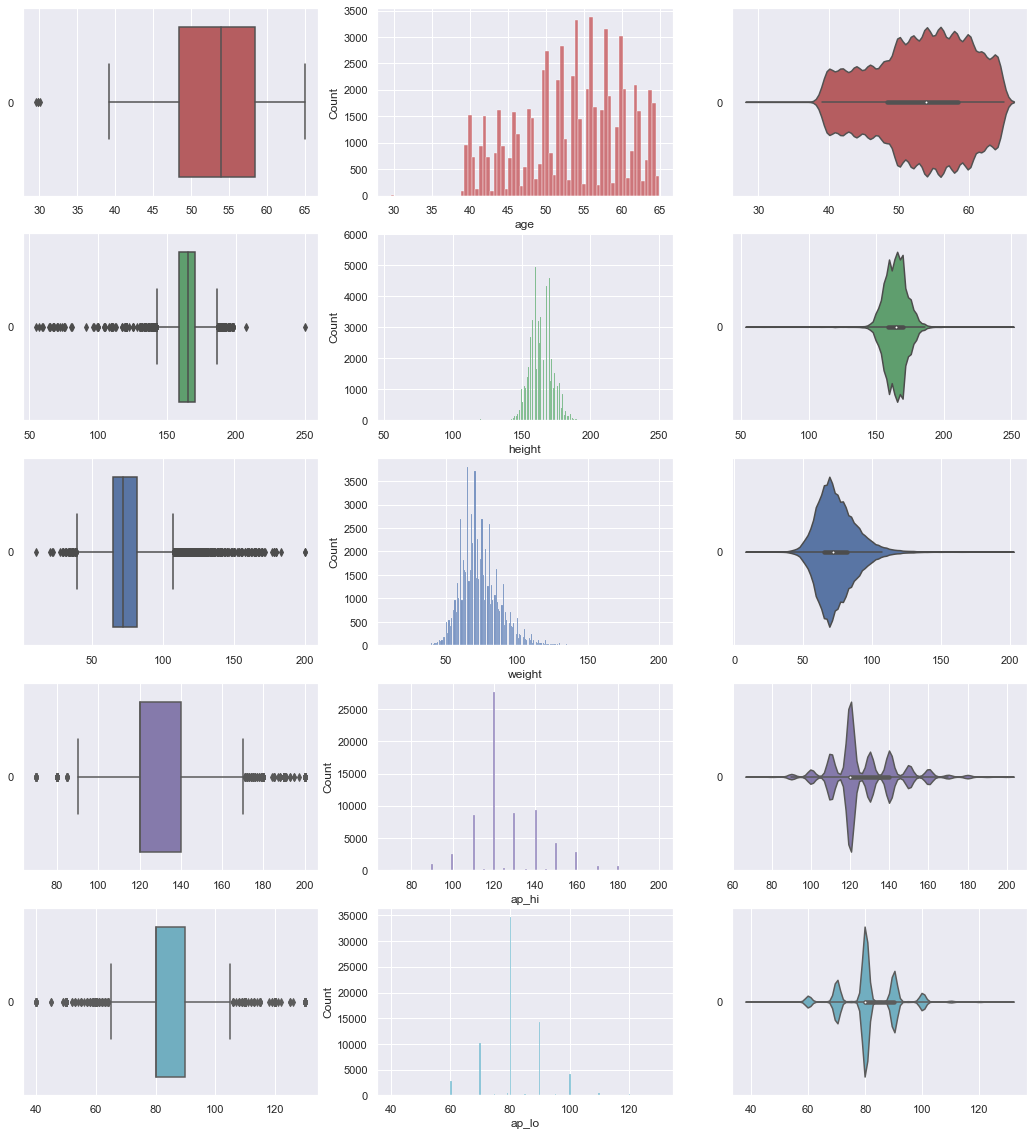

In [83]:
f, axes = plt.subplots(5, 3, figsize=(18, 20))
colors = ["r", "g", "b","m","c"]

count = 0
for var in NumData:
    sb.boxplot(data=NumData[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.histplot(data=NumData[var], color = colors[count], ax = axes[count,1])
    sb.violinplot(data=NumData[var], orient = "h", color = colors[count], ax = axes[count,2])
    count += 1
    


             age    height    weight     ap_hi     ap_lo
age     1.000000 -0.081530  0.054327  0.210257  0.155235
height -0.081530  1.000000  0.291904  0.017070  0.035442
weight  0.054327  0.291904  1.000000  0.269491  0.251700
ap_hi   0.210257  0.017070  0.269491  1.000000  0.712870
ap_lo   0.155235  0.035442  0.251700  0.712870  1.000000


<AxesSubplot:>

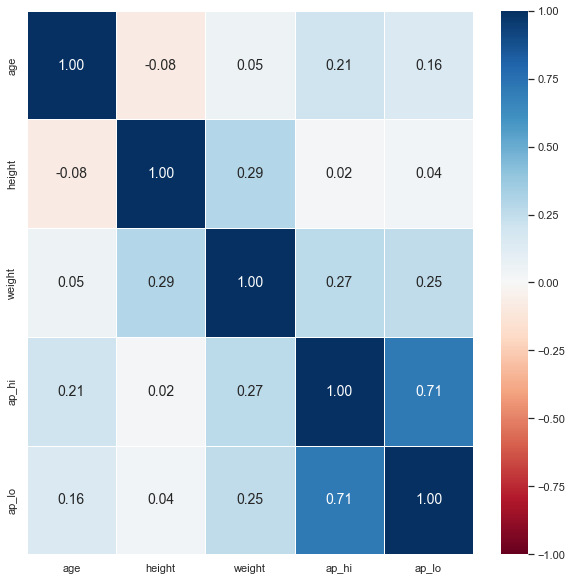

In [84]:
 #Correlation Matrix
print(NumData.corr())

# Heatmap of the Correlation Matrix
f, axes = plt.subplots(1, 1, figsize=(10, 10))
sb.heatmap(NumData.corr(), vmin = -1, vmax = 1,  linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 14}, cmap = "RdBu")

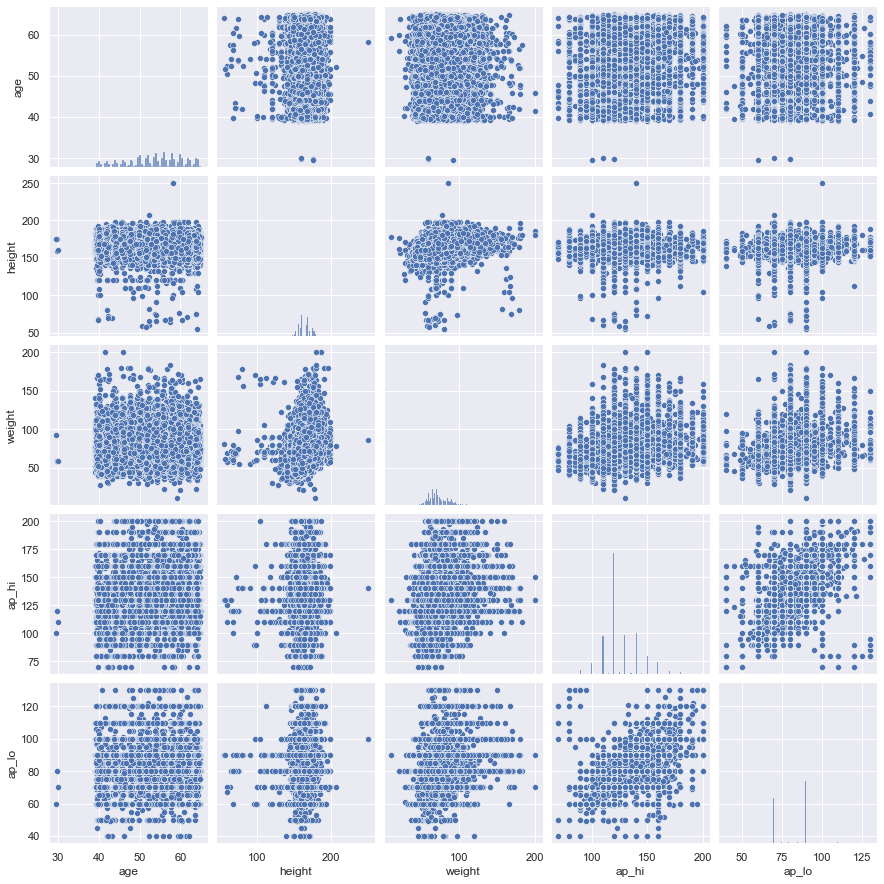

In [85]:
sb.pairplot(data = NumData)

In [86]:
for var in data[["gender","cholesterol","gluc","smoke","alco","active","cardio"]]:
    data[var] = data[var].astype('category')

print(data.dtypes)

id                int64
age             float64
gender         category
height            int64
weight          float64
ap_hi             int64
ap_lo             int64
cholesterol    category
gluc           category
smoke          category
alco           category
active         category
cardio         category
dtype: object


In [87]:
data['gender'] = data["gender"].replace([1,2],["female","male"])
data['cholesterol'] = data["cholesterol"].replace([1,2,3],["normal","above normal","well above normal"])
data['gluc'] = data["gluc"].replace([1,2,3],["normal","above normal","well above normal"])
data['smoke'] = data["smoke"].replace([1,0],["True","False"])
data['alco'] = data["alco"].replace([1,0],["Yes","No"])
data['active'] = data["active"].replace([1,0],["Yes","No"])
data['cardio'] = data["cardio"].replace([1,0],["Yes","No"])
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.391781,male,168,62.0,110,80,normal,normal,False,No,Yes,No
1,1,55.419178,female,156,85.0,140,90,well above normal,normal,False,No,Yes,Yes
2,2,51.663014,female,165,64.0,130,70,well above normal,normal,False,No,No,Yes
3,3,48.282192,male,169,82.0,150,100,normal,normal,False,No,Yes,Yes
4,4,47.873973,female,156,56.0,100,60,normal,normal,False,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52.712329,male,168,76.0,120,80,normal,normal,True,No,Yes,No
69996,99995,61.920548,female,158,126.0,140,90,above normal,above normal,False,No,Yes,Yes
69997,99996,52.235616,male,183,105.0,180,90,well above normal,normal,False,Yes,No,Yes
69998,99998,61.454795,female,163,72.0,135,80,normal,above normal,False,No,No,Yes


In [88]:
#Extract the required variables from the dataset, as mentioned in the problem.

CatData = pd.DataFrame(data[['gender','cholesterol','gluc','smoke','alco','active','cardio']])
CatData.head()

,gender,cholesterol,gluc,smoke,alco,active,cardio
0,male,normal,normal,False,No,Yes,No
1,female,well above normal,normal,False,No,Yes,Yes
2,female,well above normal,normal,False,No,No,Yes
3,male,normal,normal,False,No,Yes,Yes
4,female,normal,normal,False,No,No,No


In [89]:

    CatData.info()
    NumData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68669 entries, 0 to 69999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   gender       68669 non-null  category
 1   cholesterol  68669 non-null  category
 2   gluc         68669 non-null  category
 3   smoke        68669 non-null  category
 4   alco         68669 non-null  category
 5   active       68669 non-null  category
 6   cardio       68669 non-null  category
dtypes: category(7)
memory usage: 3.0 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 68669 entries, 0 to 69999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     68669 non-null  float64
 1   height  68669 non-null  int64  
 2   weight  68669 non-null  float64
 3   ap_hi   68669 non-null  int64  
 4   ap_lo   68669 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 5.2 MB


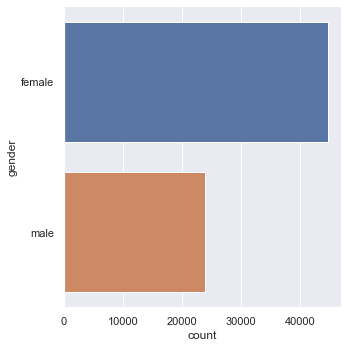

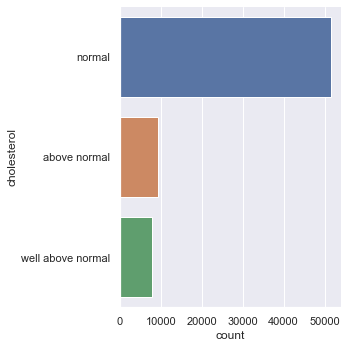

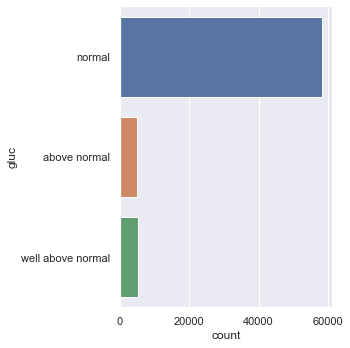

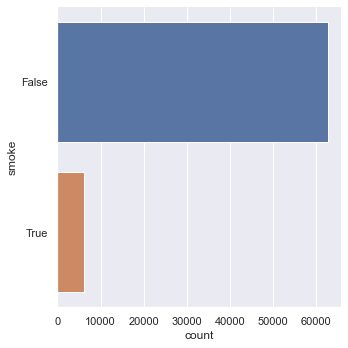

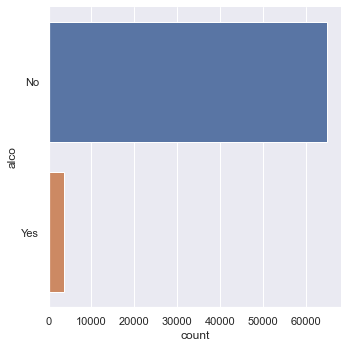

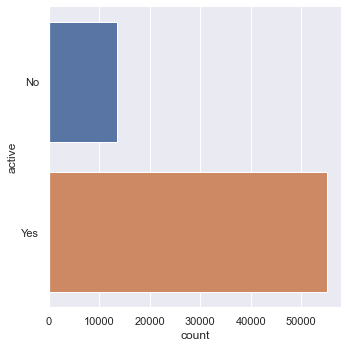

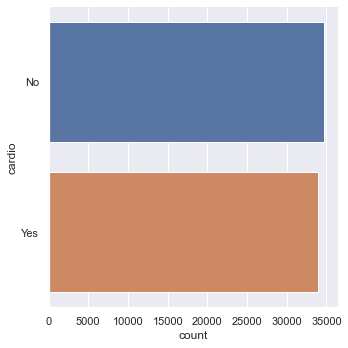

In [90]:
for var in CatData:
    sb.catplot(y = var, data = CatData, kind = "count", height = 5)



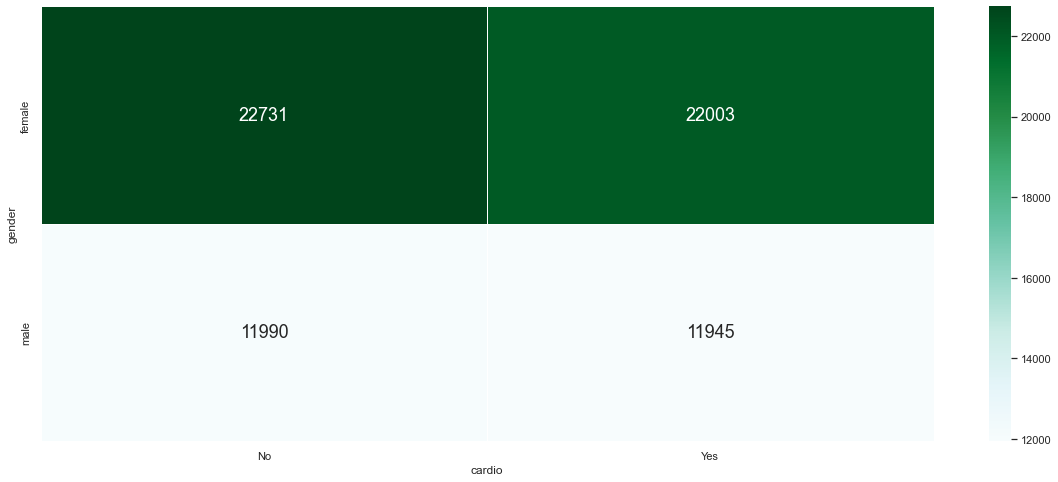

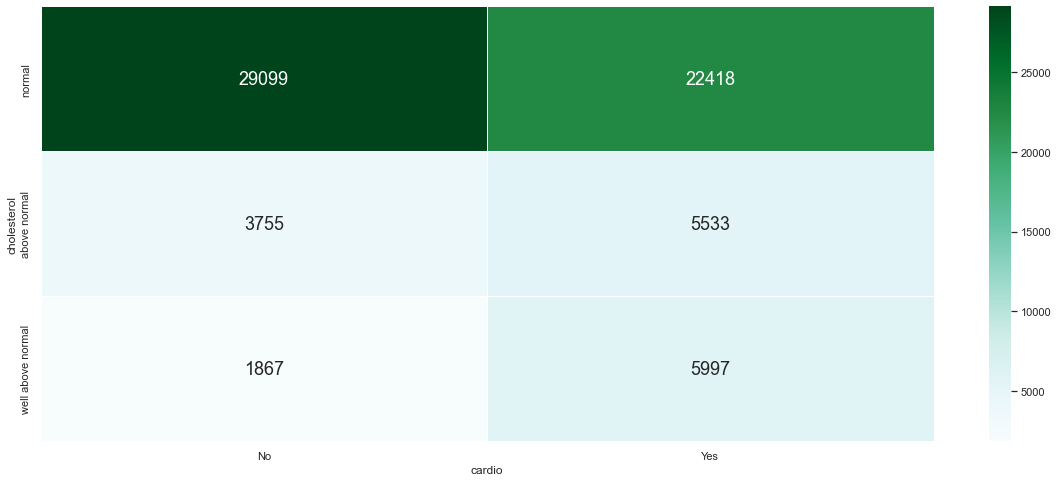

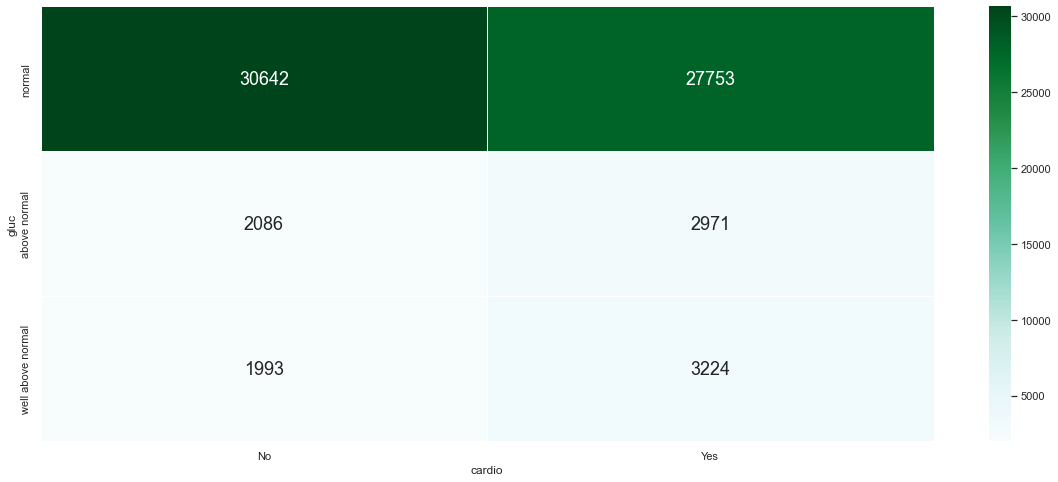

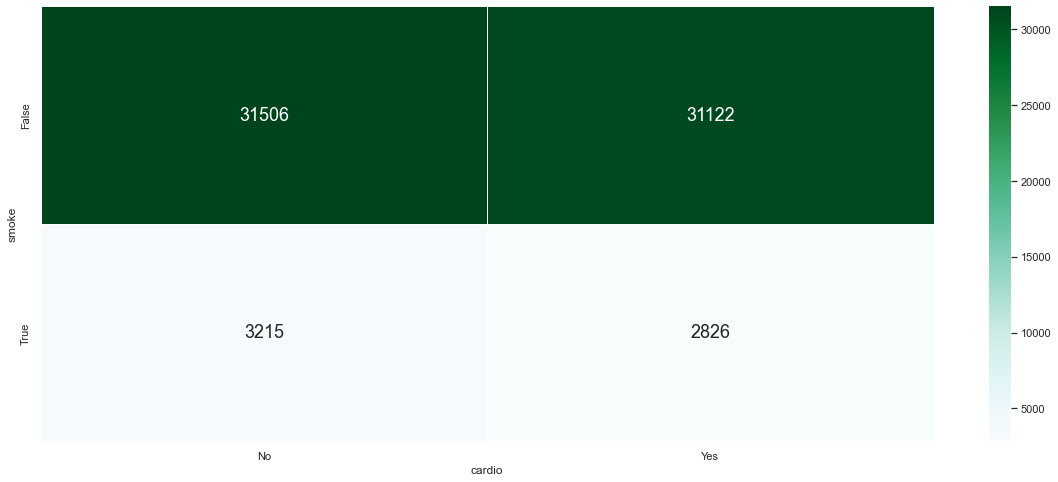

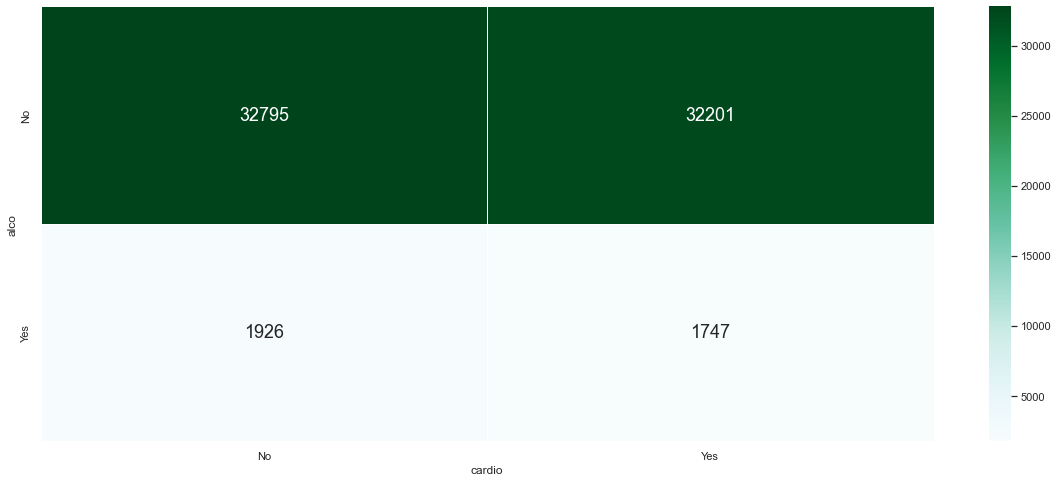

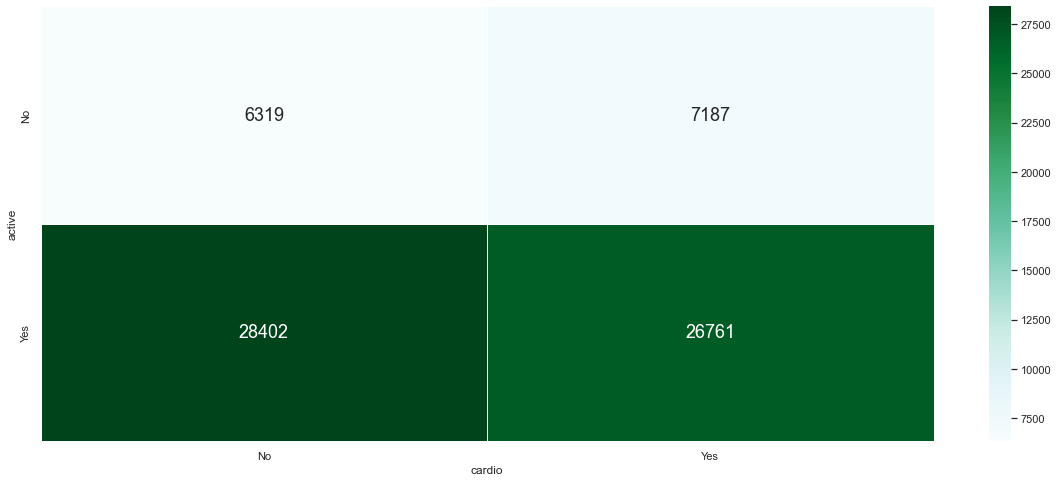

In [91]:
for var in CatData[['gender','cholesterol','gluc','smoke','alco','active']]:
    f, axes = plt.subplots(1, 1, figsize=(20, 8))
    sb.heatmap(CatData.groupby([var, 'cardio']).size().unstack(), 
             linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

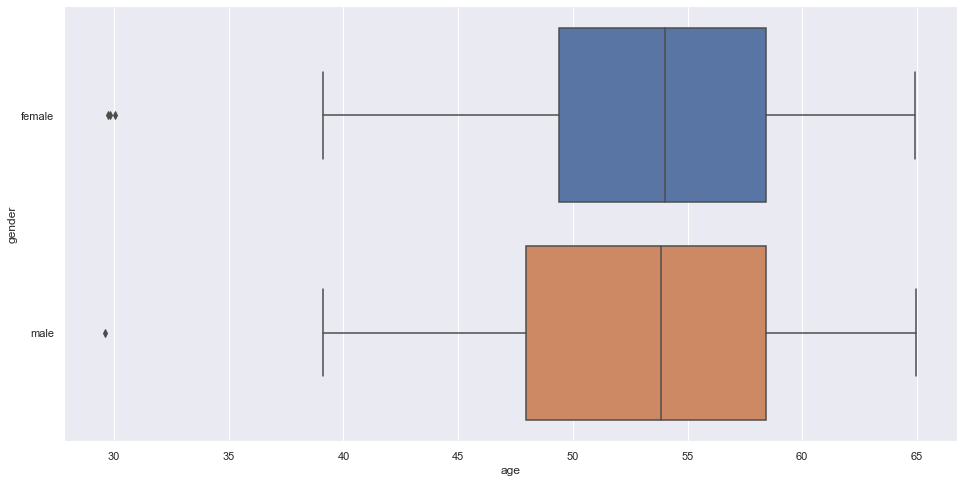

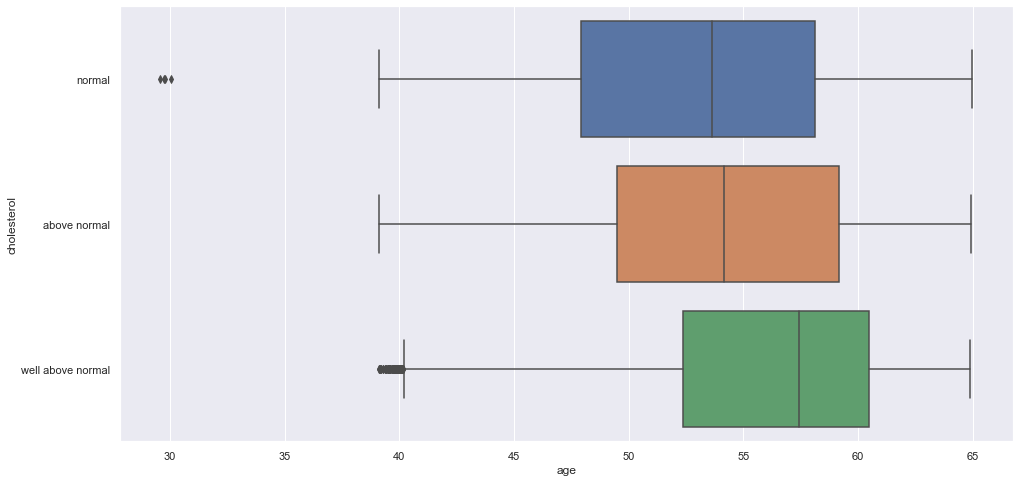

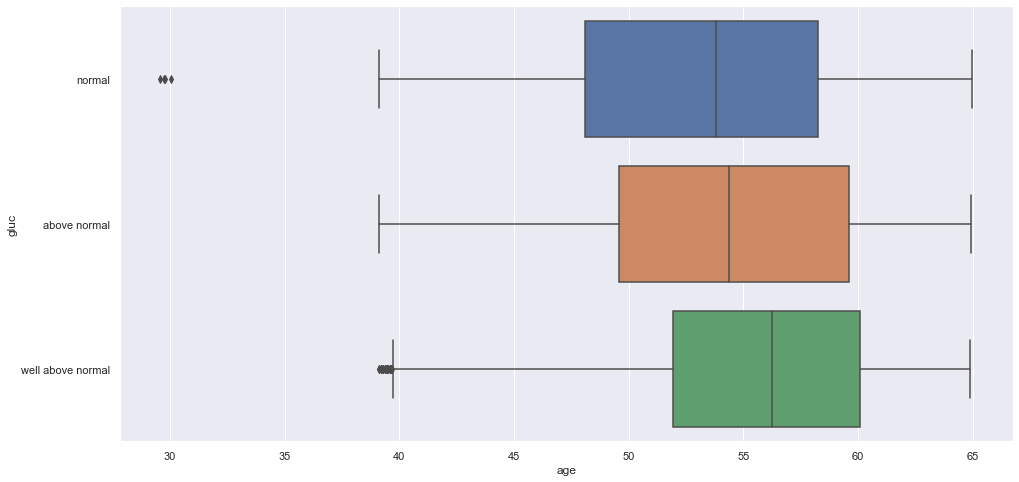

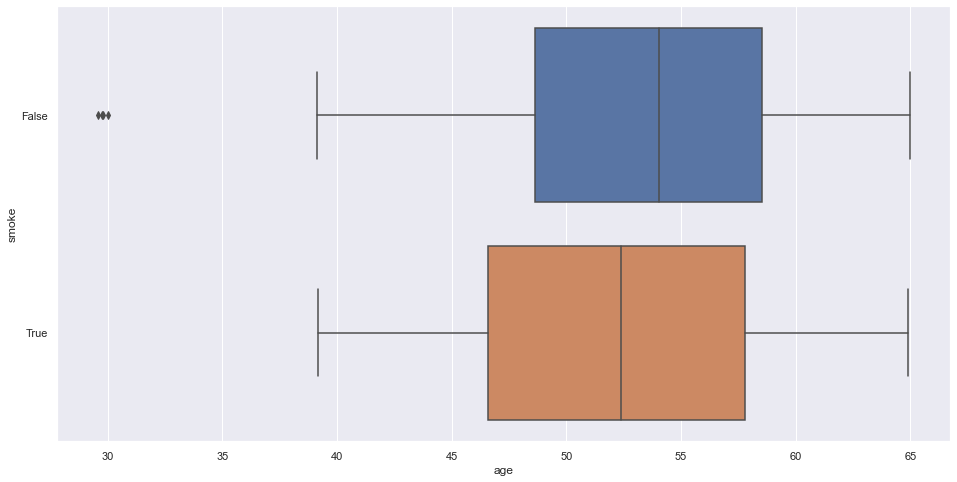

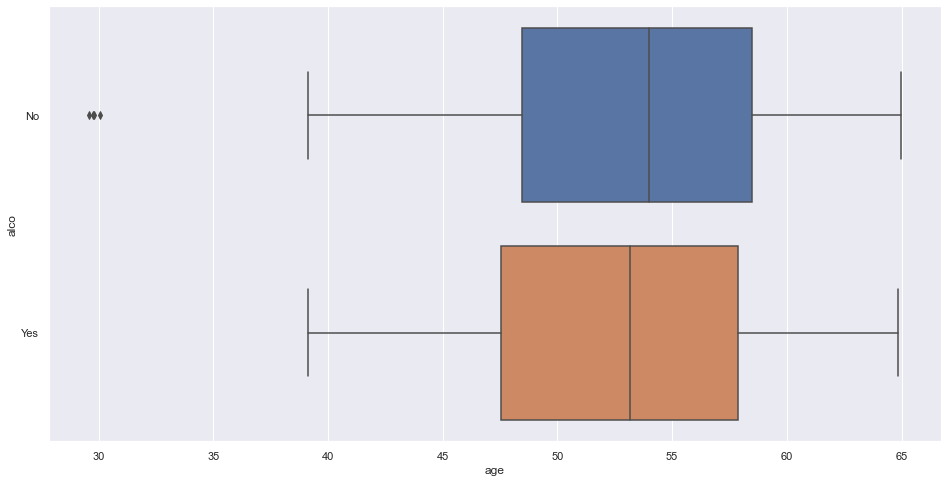

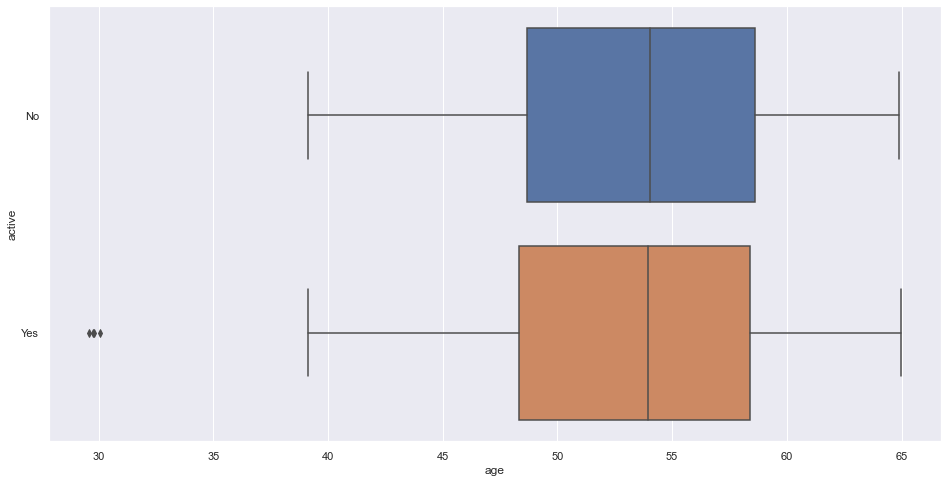

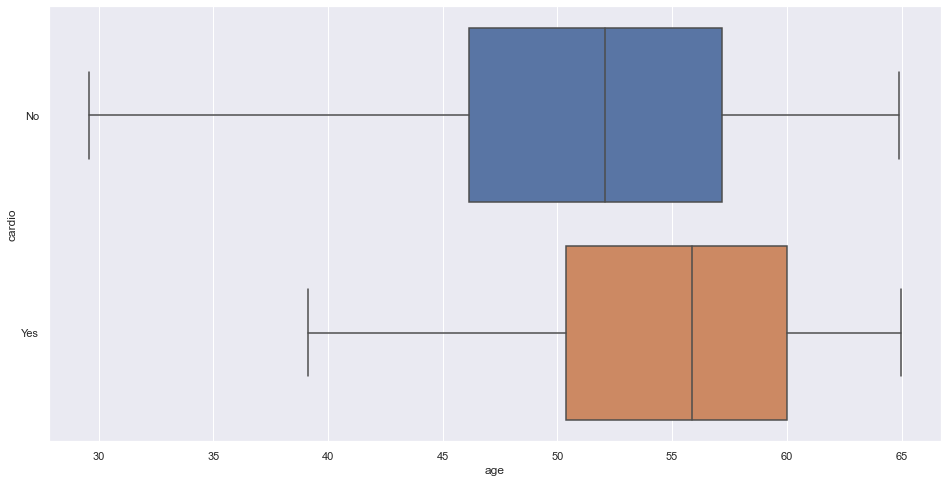

In [92]:
for var in CatData:
    f, axes = plt.subplots(1, 1, figsize=(16, 8))
    sb.boxplot(x = 'age', y = CatData[var], data = data)

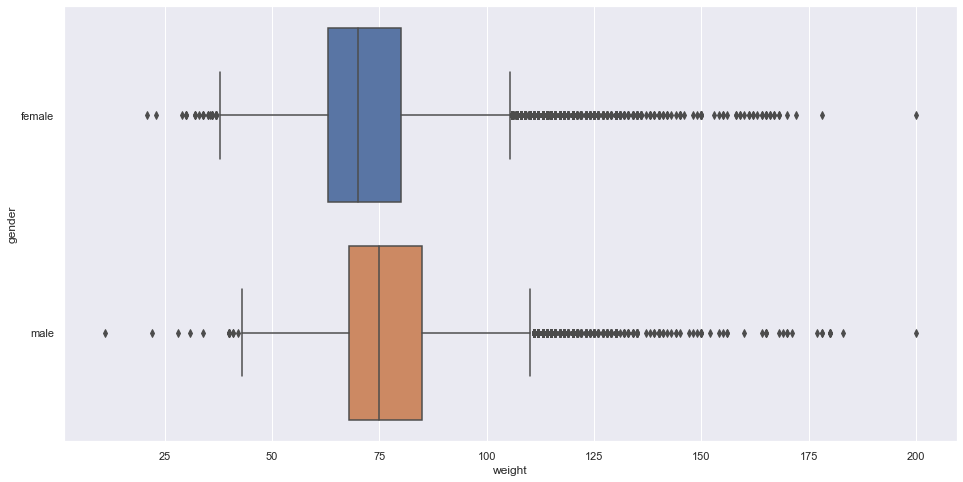

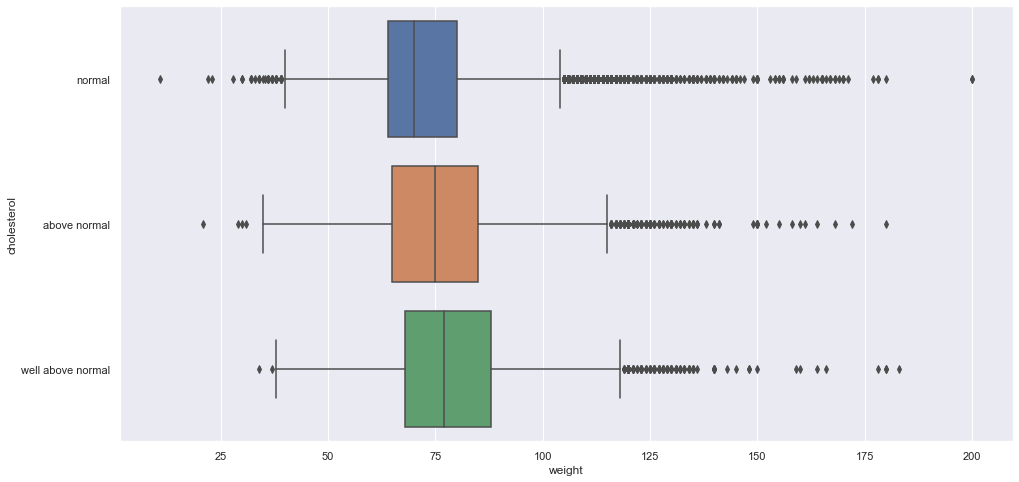

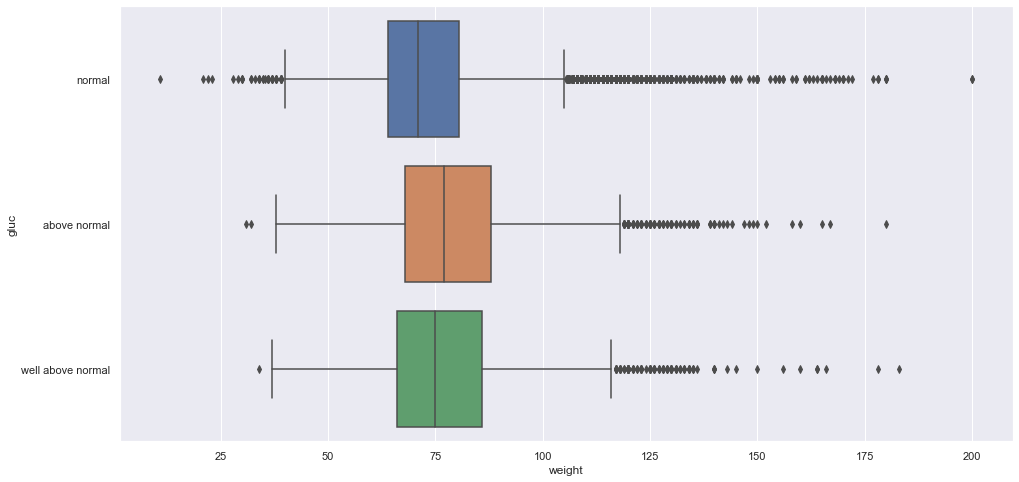

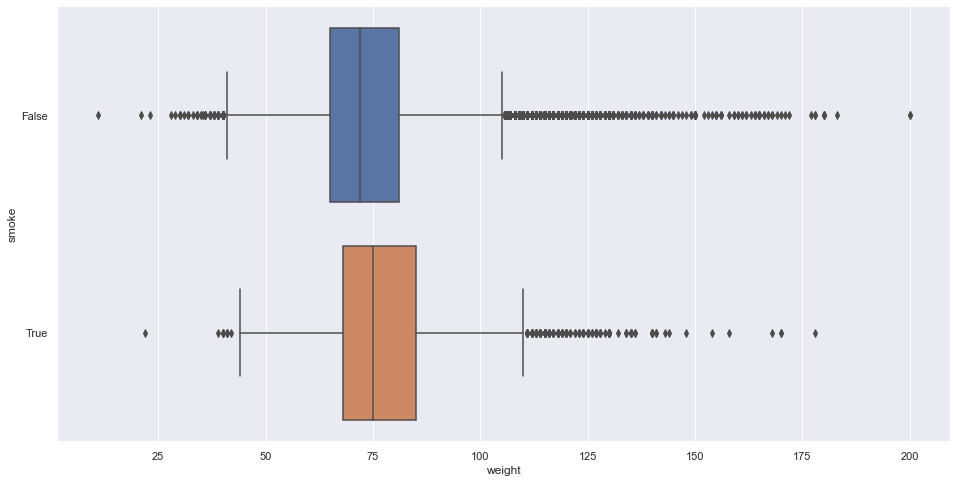

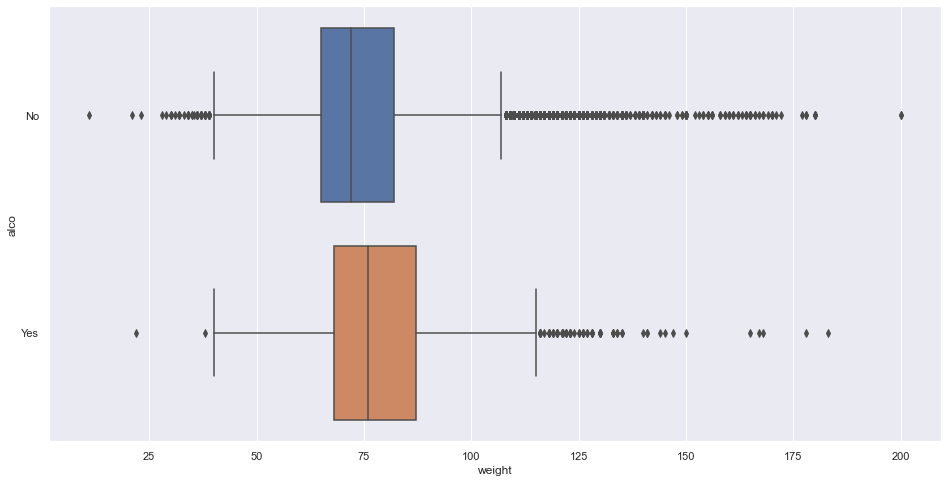

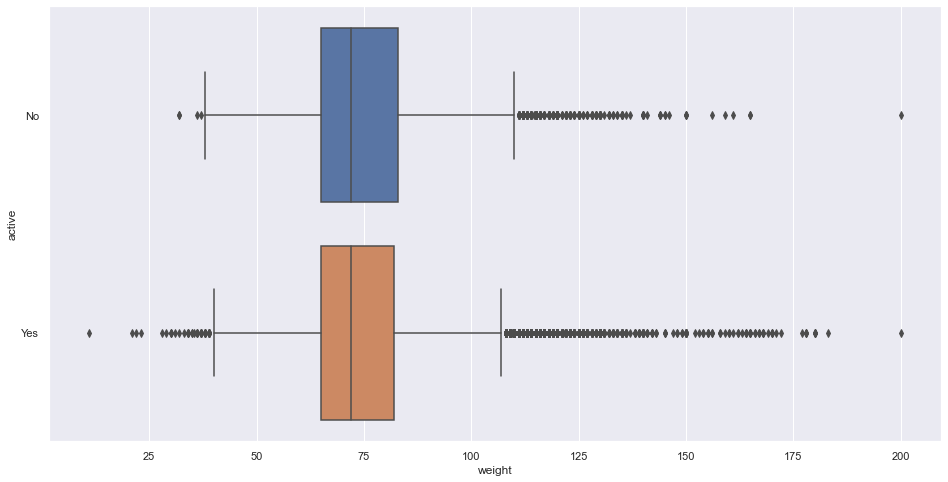

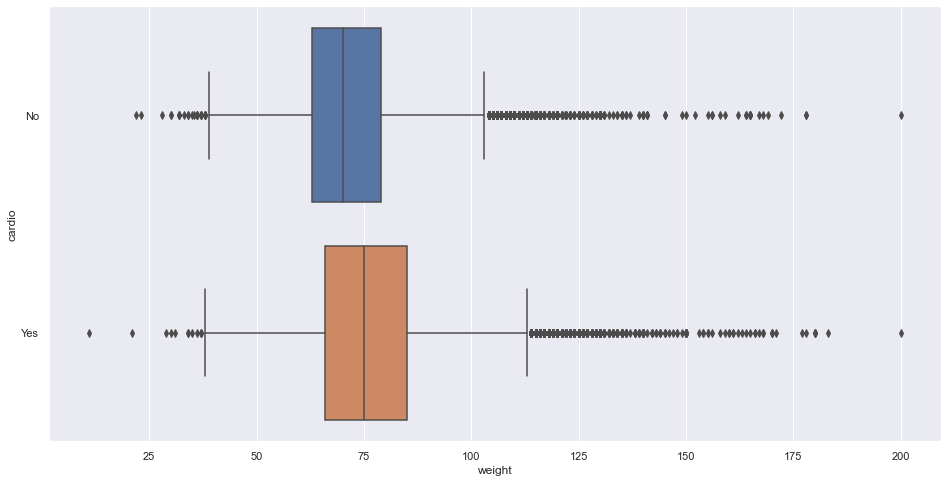

In [93]:
for var in CatData:
    f, axes = plt.subplots(1, 1, figsize=(16, 8))
    sb.boxplot(x = 'weight', y = CatData[var], data = data)

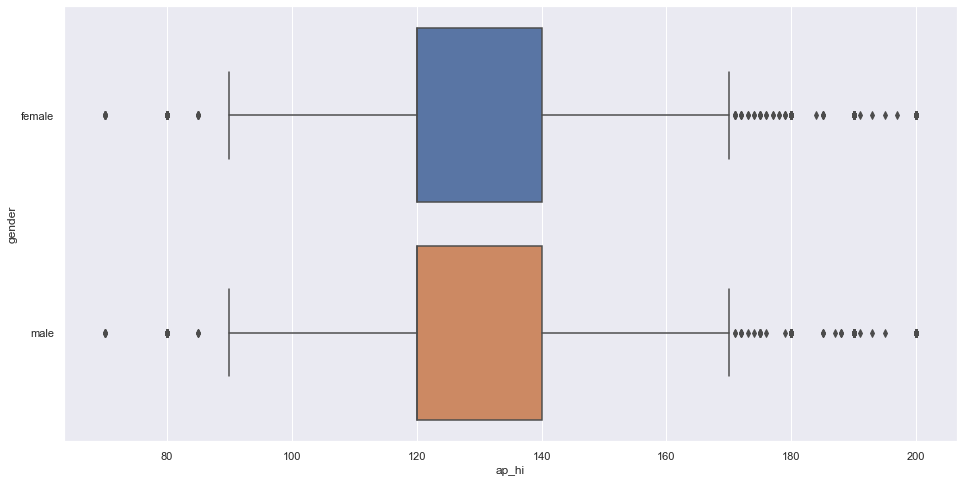

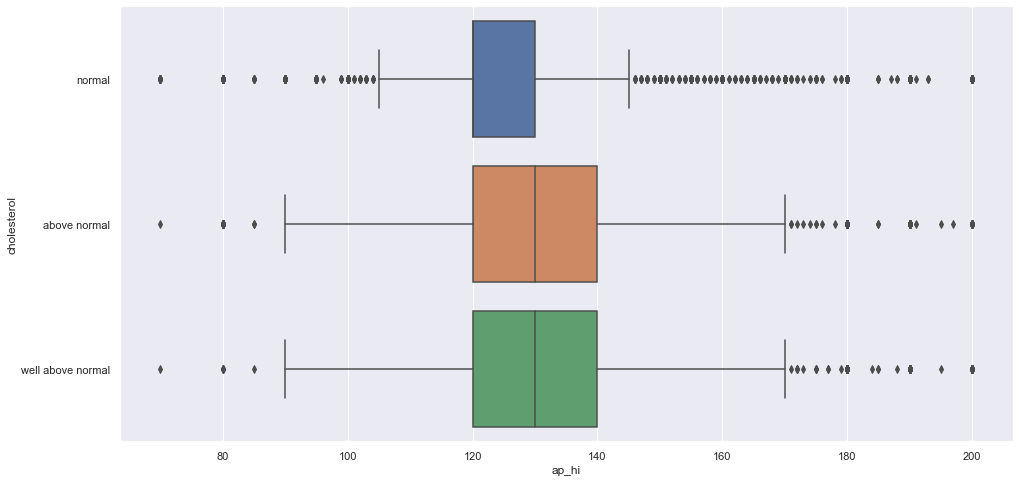

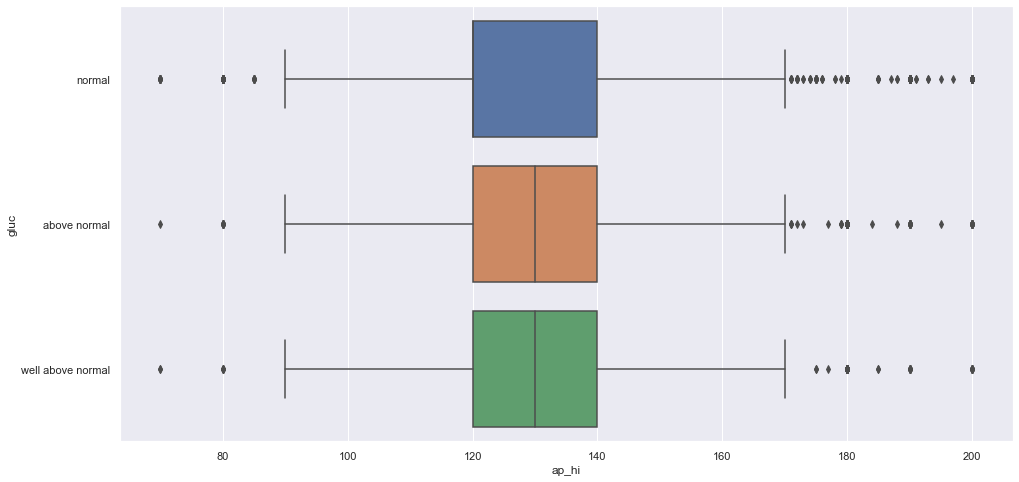

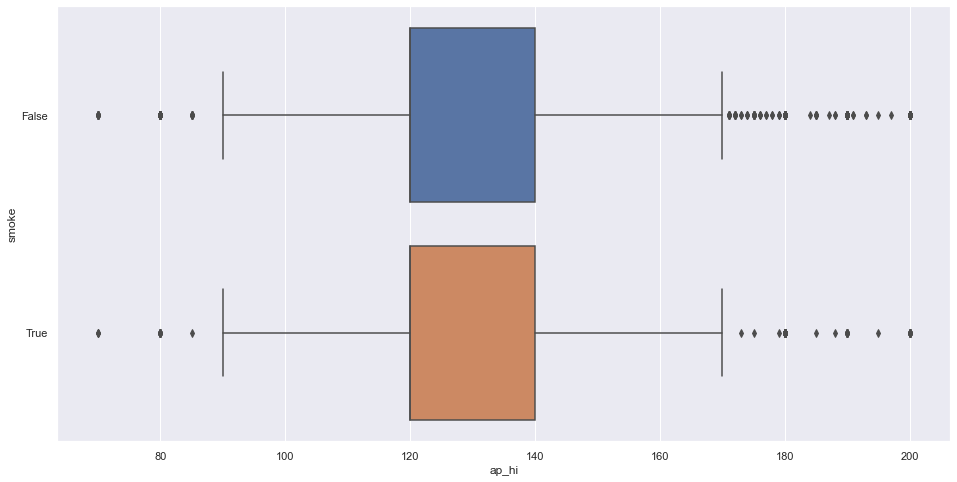

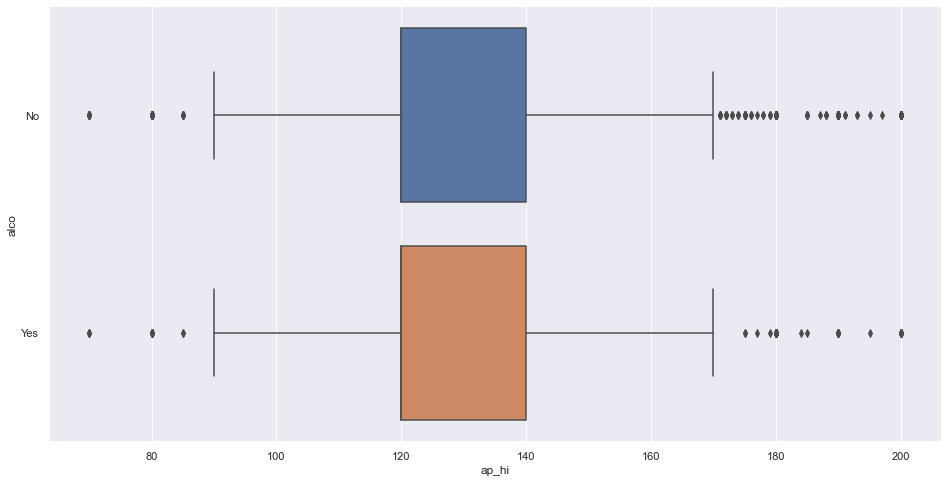

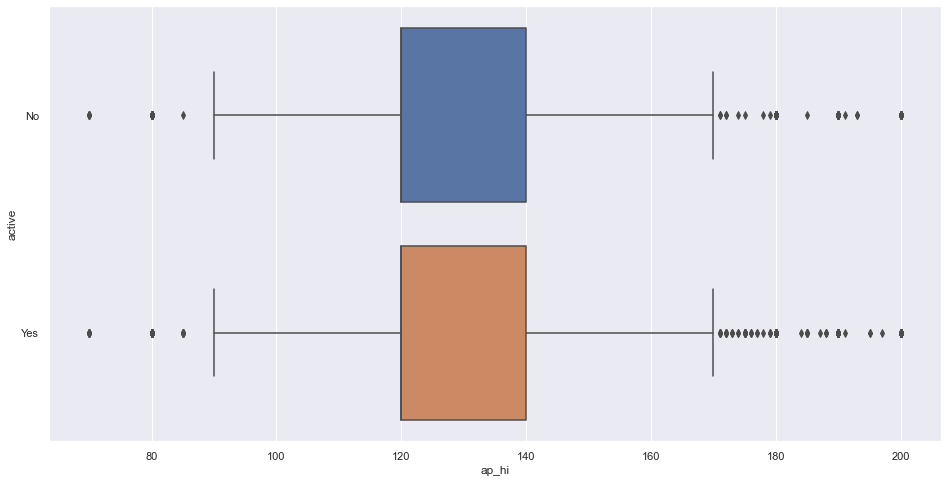

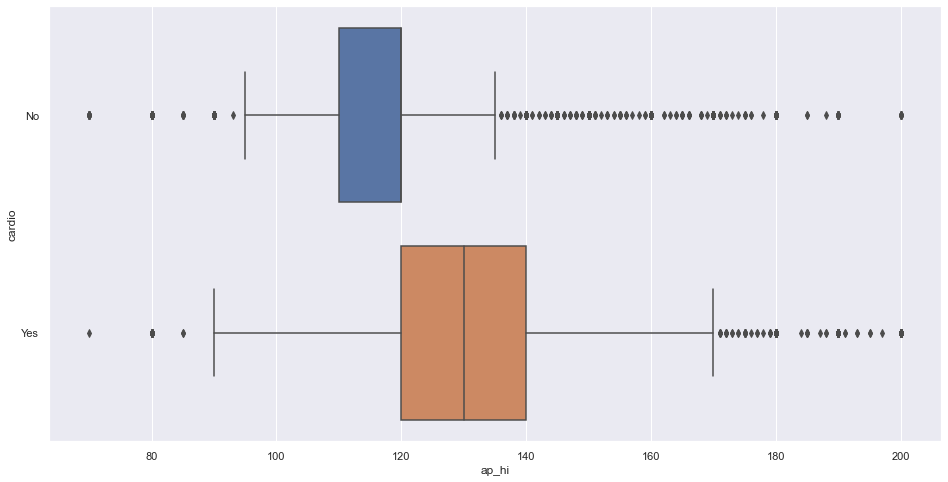

In [94]:
for var in CatData:
    f, axes = plt.subplots(1, 1, figsize=(16, 8))
    sb.boxplot(x = 'ap_hi', y = CatData[var], data = data)

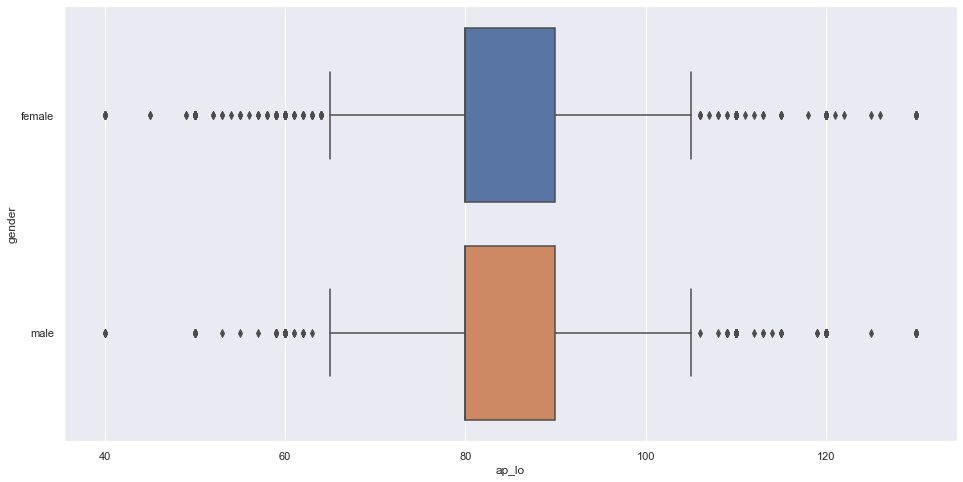

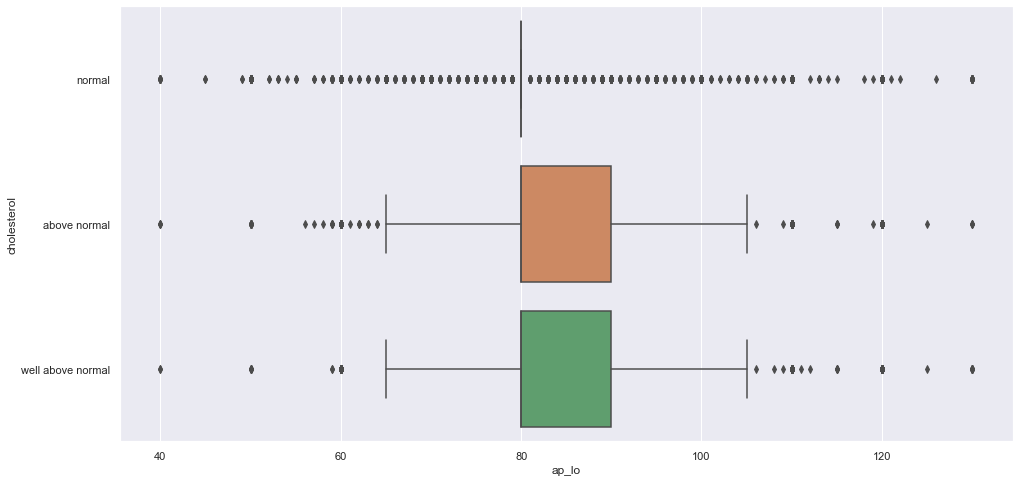

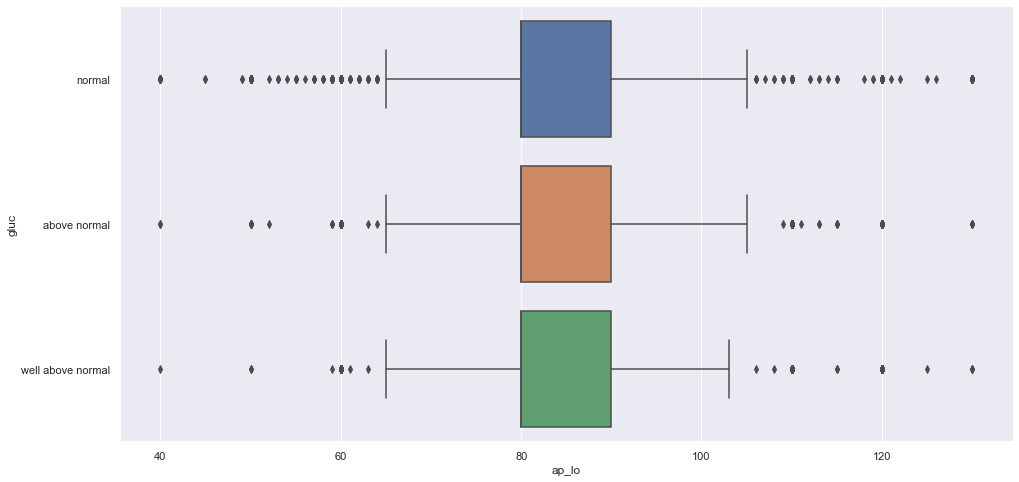

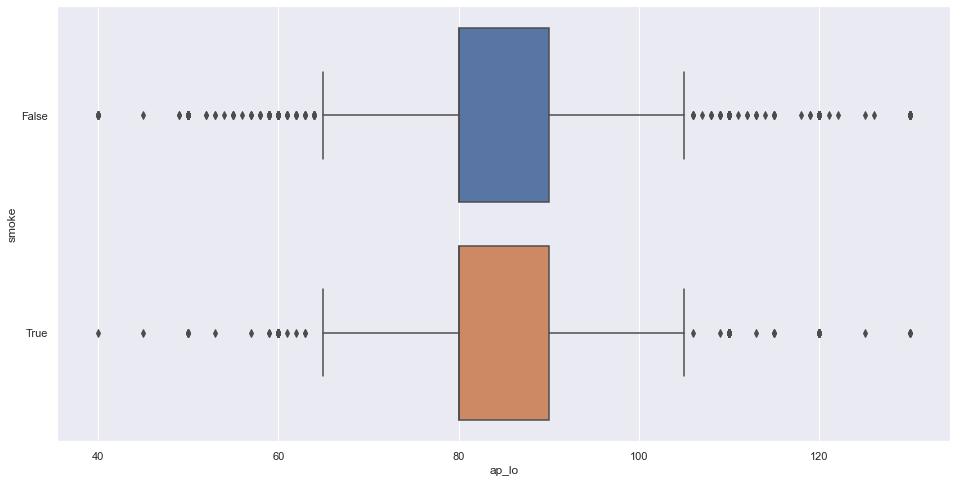

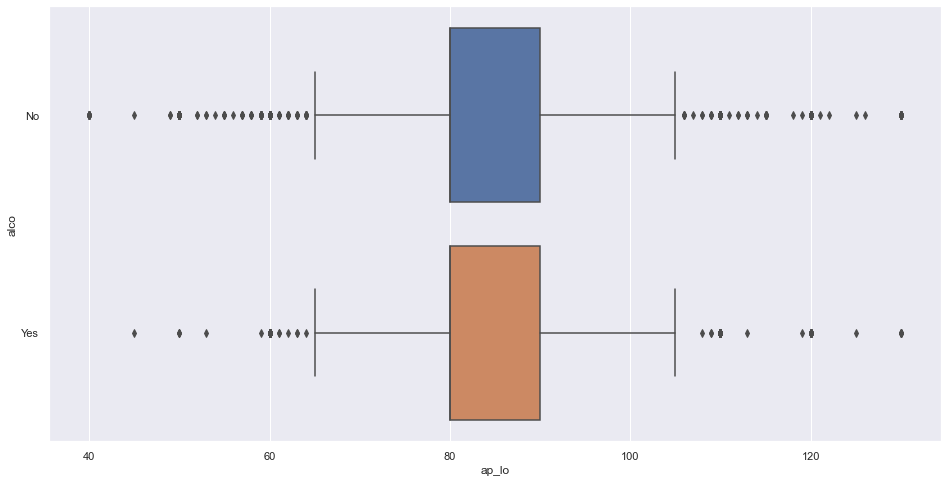

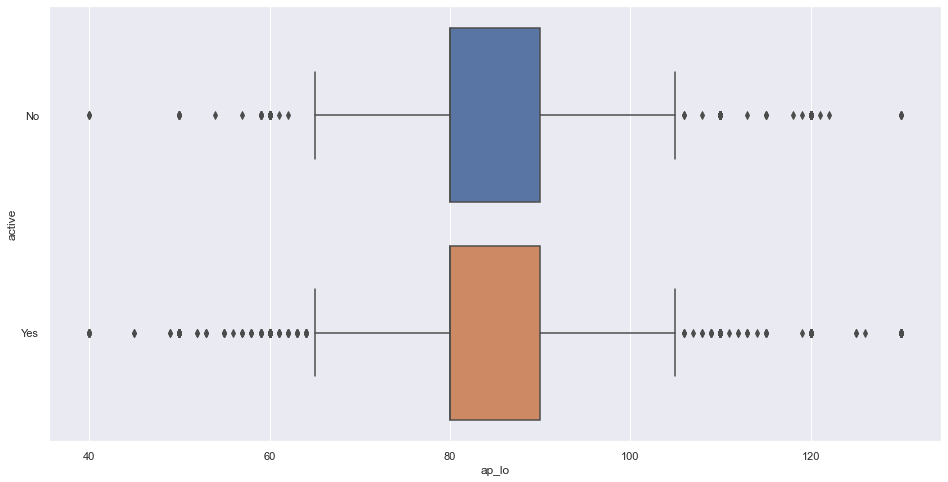

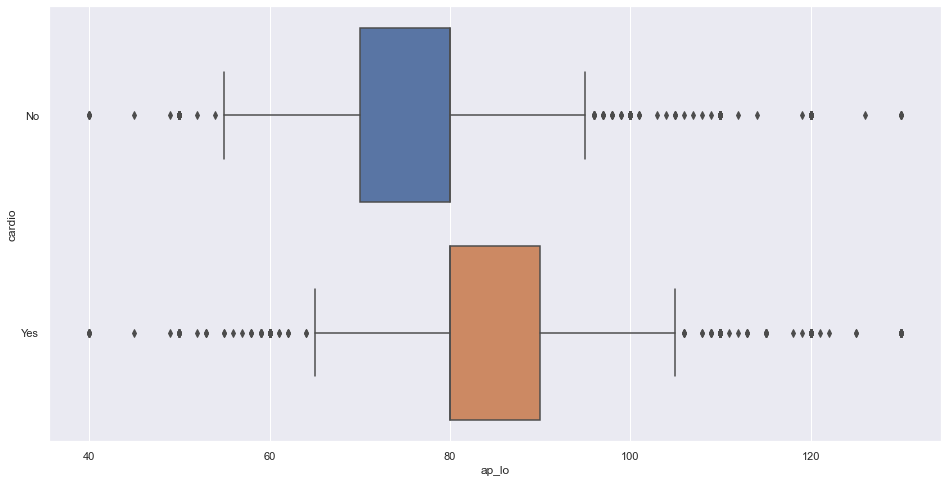

In [95]:
for var in CatData:
    f, axes = plt.subplots(1, 1, figsize=(16, 8))
    sb.boxplot(x = 'ap_lo', y = CatData[var], data = data)